# Learning Pandas and Matplotlib

### Importing libraries and data

In [88]:
!curl -L https://www.dropbox.com/s/qsodvwpcyu3mxei/NYC%20Restaurants.csv?dl=1 -o NYC_Restaurants.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  156M  100  156M    0     0  15.0M      0  0:00:10  0:00:10 --:--:-- 23.9M


In [89]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


### Read NYC Restaurant CSV

In [90]:
rests = pd.read_csv("NYC_Restaurants.csv")


In [91]:
mRests = rests[rests['BORO']=="MANHATTAN"] ## Look at only Manhattan Data


In [92]:
mRests['BORO']

0         MANHATTAN
4         MANHATTAN
5         MANHATTAN
10        MANHATTAN
11        MANHATTAN
13        MANHATTAN
16        MANHATTAN
20        MANHATTAN
21        MANHATTAN
22        MANHATTAN
25        MANHATTAN
27        MANHATTAN
29        MANHATTAN
34        MANHATTAN
36        MANHATTAN
40        MANHATTAN
41        MANHATTAN
47        MANHATTAN
48        MANHATTAN
49        MANHATTAN
52        MANHATTAN
55        MANHATTAN
60        MANHATTAN
63        MANHATTAN
64        MANHATTAN
66        MANHATTAN
67        MANHATTAN
69        MANHATTAN
71        MANHATTAN
74        MANHATTAN
            ...    
451565    MANHATTAN
451569    MANHATTAN
451571    MANHATTAN
451572    MANHATTAN
451573    MANHATTAN
451575    MANHATTAN
451576    MANHATTAN
451581    MANHATTAN
451582    MANHATTAN
451585    MANHATTAN
451589    MANHATTAN
451590    MANHATTAN
451591    MANHATTAN
451592    MANHATTAN
451594    MANHATTAN
451596    MANHATTAN
451597    MANHATTAN
451599    MANHATTAN
451600    MANHATTAN


In [93]:
list(mRests.columns.values)

['CAMIS',
 'DBA',
 'BORO',
 'BUILDING',
 'STREET',
 'ZIPCODE',
 'PHONE',
 'CUISINE DESCRIPTION',
 'INSPECTION DATE',
 'ACTION',
 'VIOLATION CODE',
 'VIOLATION DESCRIPTION',
 'CRITICAL FLAG',
 'SCORE',
 'GRADE',
 'GRADE DATE',
 'RECORD DATE',
 'INSPECTION TYPE']

In [94]:
mRests = mRests[mRests['GRADE']!="Not Yet Graded"] ## Remove stores that have not been graded yet

In [95]:
mRests = mRests[pd.notnull(mRests["GRADE"])] ## Remove Stores that have no grade

In [96]:
mRests=mRests[pd.notnull(mRests["SCORE"])] ## Remove stores with no score

In [97]:
mRests["SCORE"].describe()

count    84381.000000
mean        13.120051
std          8.340741
min         -1.000000
25%          9.000000
50%         11.000000
75%         13.000000
max        131.000000
Name: SCORE, dtype: float64

In [98]:
mRests["GRADE"] = mRests["GRADE"].astype("category",categories = ["A","B","C","P","Z"], ordered = True) ## redefine score levels

In [99]:
mRests = mRests.reset_index(drop=True)
mRests.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,41701548,TWO-BITS RETRO ARCADE,MANHATTAN,153,ESSEX STREET,10002,2124778161,American,04/03/2014,Violations were cited in the following area(s).,06F,Wiping cloths soiled or not stored in sanitizi...,Critical,23.0,B,04/03/2014,07/04/2016,Cycle Inspection / Re-inspection
1,41058228,CHA-AN TEAHOUSE,MANHATTAN,230,EAST 9 STREET,10003,2122288030,Japanese,12/22/2014,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,7.0,A,12/22/2014,07/04/2016,Cycle Inspection / Re-inspection
2,40424906,MANNA HOUSE BAKERY,MANHATTAN,87,EAST BROADWAY,10002,2122676200,Bakery,04/27/2015,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,10.0,A,04/27/2015,07/04/2016,Cycle Inspection / Re-inspection
3,41514752,FRANCOIS PAYARD BAKERY,MANHATTAN,116,WEST HOUSTON STREET,10012,2129950888,Bakery,11/12/2013,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,10.0,A,11/12/2013,07/04/2016,Cycle Inspection / Initial Inspection
4,41288500,IL MELOGRANO,MANHATTAN,501,WEST 51 STREET,10019,2127579290,Italian,09/21/2015,Violations were cited in the following area(s).,02G,Cold food item held above 41ÃÂº F (smoked fish ...,Critical,9.0,A,09/21/2015,07/04/2016,Cycle Inspection / Re-inspection


## Plotting with Pandas and Matplotlib

### Using Matplotlib

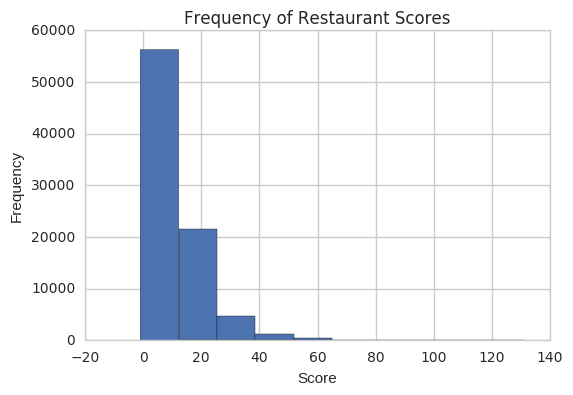

In [100]:
f, ax = plt.subplots() ## creates figure area with axes
# histogram our data with numpy
data = mRests['SCORE']

plt.hist(data)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title("Frequency of Restaurant Scores")

plt.show()

### Using Pandas

In [101]:
plt.style.use('seaborn-colorblind')

In [102]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'seaborn-muted',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'classic',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

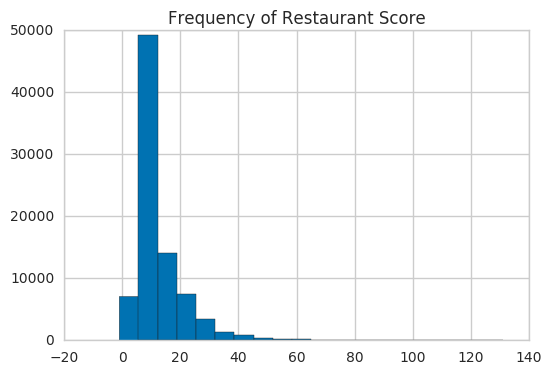

In [103]:
mRests["SCORE"].hist(bins=20)
plt.title("Frequency of Restaurant Score")

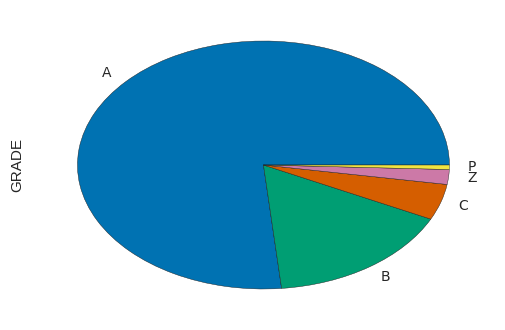

In [104]:
mRests["GRADE"].value_counts().plot(kind = "pie")

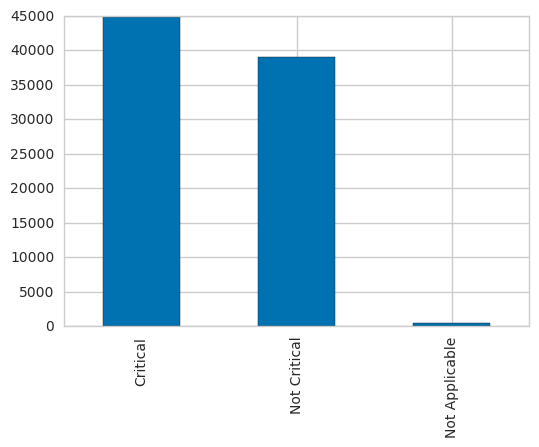

In [105]:
mRests['CRITICAL FLAG'].value_counts().plot(kind='bar')

# Seaborn

In [106]:
## pip install seaborn
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)


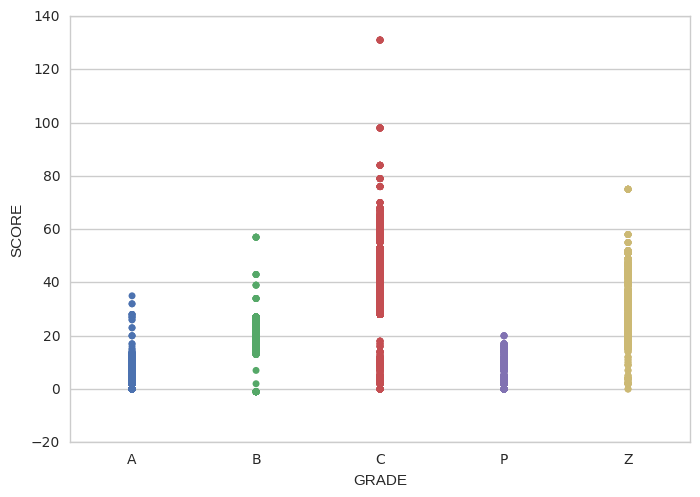

In [107]:
sns.stripplot(x="GRADE", y = "SCORE", data = mRests) #without jitter

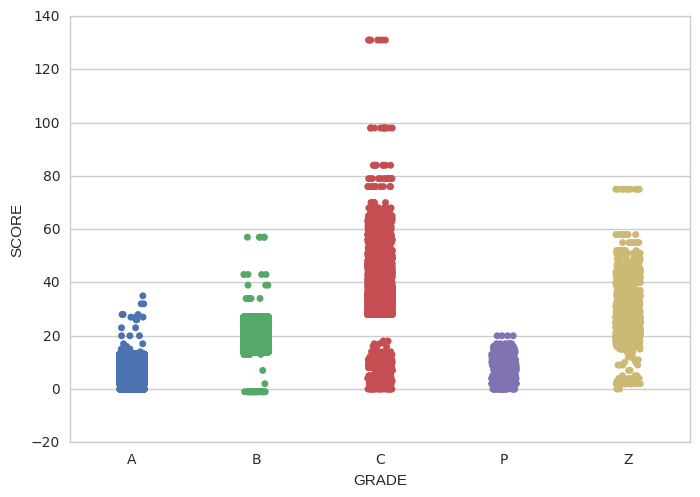

In [108]:
sns.stripplot(x="GRADE", y = "SCORE", data = mRests, jitter = True)

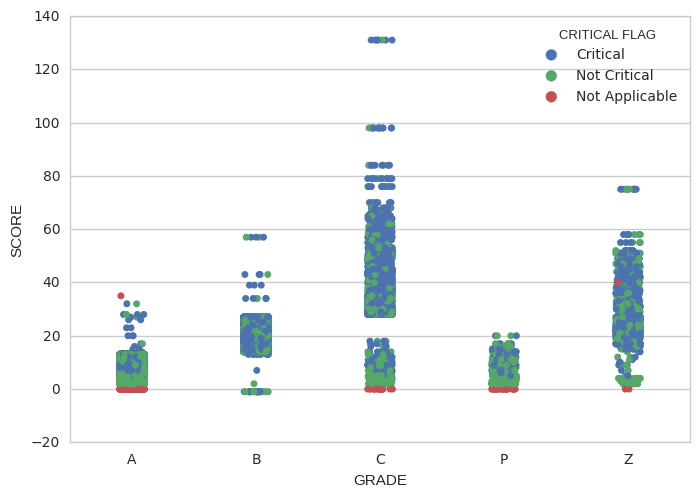

In [109]:
sns.stripplot(x="GRADE", y = "SCORE", hue = "CRITICAL FLAG", data = mRests, jitter = True)

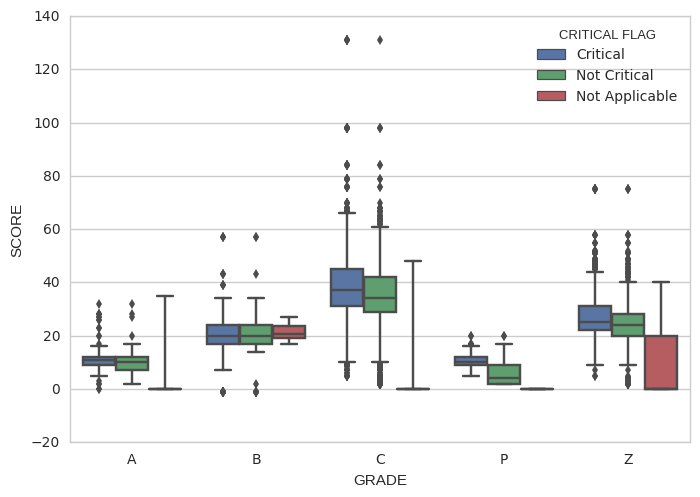

In [110]:
sns.boxplot(x="GRADE",y="SCORE", hue = "CRITICAL FLAG", data = mRests)

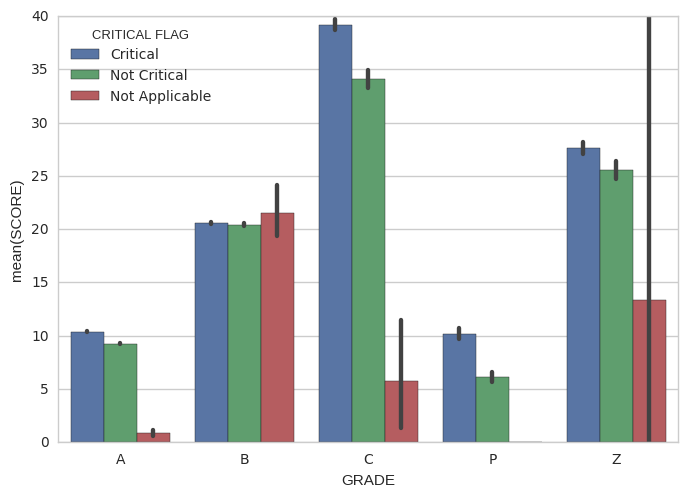

In [111]:
sns.barplot(x="GRADE", y = "SCORE", hue = "CRITICAL FLAG", data = mRests)

## Convert Addresses to Lat/Long 

In [112]:
# !pip install -e git+https://github.com/pwdyson/inflect.py#egg=inflect

In [113]:
# !conda update anaconda --y

In [114]:
!pip install inflect


You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [115]:
import inflect
p = inflect.engine()
word_to_number_mapping = {}

for i in range(1, 200):
    word_form = p.number_to_words(i)  # 1 -> 'one'
    ordinal_word = p.ordinal(word_form)  # 'one' -> 'first'
    ordinal_number = p.ordinal(i)  # 1 -> '1st'
    word_to_number_mapping[ordinal_word] = ordinal_number  # 'first': '1st'
    

In [116]:
import re
for i in range(len(mRests)):

    street= mRests['STREET'][i].split()    
    for j in range(len(street)):
        if street[j].lower() in word_to_number_mapping:
            
            street[j]=  word_to_number_mapping[street[j].lower()]
#     streetFull = ' '.join(street)
    for j in range(len(street)):
        if re.findall(r'([0-9]+(st|rd|th|nd)+)', street[j].lower())==[]:
            if(filter(str.isdigit, street[j])!=''):
                val=int(filter(str.isdigit, street[j]))
                street[j]=street[j].replace(str(val), str(p.ordinal(val)))    
        streetFull = ' '.join(street)
        mRests.set_value(i,'STREET',streetFull)
  

In [117]:
mRests["STREET"]


0                  ESSEX STREET
1               EAST 9th STREET
2                 EAST BROADWAY
3           WEST HOUSTON STREET
4              WEST 51st STREET
5                    LIBERTY ST
6                     MORTON ST
7                 HESTER STREET
8               EAST 6th STREET
9              WEST 40th STREET
10                 PEARL STREET
11                LEXINGTON AVE
12            UNION SQUARE EAST
13                   1st AVENUE
14                   1ST AVENUE
15             WEST 27th STREET
16                    W 58TH ST
17                THOMAS STREET
18                       BOWERY
19              COLUMBUS AVENUE
20                   5th AVENUE
21             EAST 23rd STREET
22                  MAIN STREET
23             WEST 48th STREET
24                   7th AVENUE
25              COMMERCE STREET
26                   8th AVENUE
27             WEST 33rd STREET
28                     PARK AVE
29            ROCKEFELLER PLAZA
                  ...          
84351   

In [118]:
mRests["Address"]=mRests['BUILDING'].map(str)+ " " + mRests['STREET'].map(str)+ ", " + mRests['ZIPCODE'].map(str)

### Sample data with same seed every time

In [119]:
# import random
np.random.seed(seed=10)
rows = np.random.choice(mRests.index.values, 100)
samp = mRests.ix[rows]
# samp = random.sample(mRests,90)
samp= samp.reset_index(drop=True)
samp

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Address
0,41632866,CITY CAFE,MANHATTAN,35,WEST 43rd STREET,10036,2127640444,Delicatessen,01/04/2013,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,12.0,A,01/04/2013,07/04/2016,Cycle Inspection / Re-inspection,"35 WEST 43rd STREET, 10036"
1,50008977,MOKBAR,MANHATTAN,75,9th AVE,10011,6469645963,Korean,05/07/2015,Violations were cited in the following area(s).,06F,Wiping cloths soiled or not stored in sanitizi...,Critical,11.0,A,05/07/2015,07/04/2016,Cycle Inspection / Initial Inspection,"75 9th AVE, 10011"
2,41510644,CURRY HUT,MANHATTAN,534,9th AVENUE,10018,2129675885,Bangladeshi,11/26/2013,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,4.0,A,11/26/2013,07/04/2016,Cycle Inspection / Re-inspection,"534 9th AVENUE, 10018"
3,41706078,AU BON PAIN,MANHATTAN,599,LEXINGTON AVENUE,10022,2123554815,American,05/01/2015,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,13.0,A,05/01/2015,07/04/2016,Cycle Inspection / Initial Inspection,"599 LEXINGTON AVENUE, 10022"
4,41520658,V-NAM CAFE,MANHATTAN,1820,1st AVENUE,10009,2127806020,Vietnamese/Cambodian/Malaysia,12/18/2013,Violations were cited in the following area(s).,10H,Proper sanitization not provided for utensil w...,Not Critical,36.0,C,12/18/2013,07/04/2016,Cycle Inspection / Re-inspection,"1820 1st AVENUE, 10009"
5,50017080,TEN REN'S TEA TIME,MANHATTAN,73,MOTT ST,10013,2123492286,CafÃÂ©/Coffee/Tea,03/05/2015,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,10.0,A,03/05/2015,07/04/2016,Cycle Inspection / Initial Inspection,"73 MOTT ST, 10013"
6,41336336,SOPHIE'S,MANHATTAN,507,EAST 5th STREET,10009,2122285680,American,03/05/2014,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,5.0,A,03/05/2014,07/04/2016,Cycle Inspection / Initial Inspection,"507 EAST 5th STREET, 10009"
7,40392430,IPANEMA BAR,MANHATTAN,252,WEST 14th STREET,10011,2128070150,Spanish,06/15/2016,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,20.0,Z,06/15/2016,07/04/2016,Cycle Inspection / Re-inspection,"252 WEST 14th STREET, 10011"
8,41602657,WAT'S ON YOUR PLATE,MANHATTAN,513,WEST 145th STREET,10031,2122344411,Caribbean,05/16/2015,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,24.0,B,05/16/2015,07/04/2016,Cycle Inspection / Re-inspection,"513 WEST 145th STREET, 10031"
9,41624304,THE HUMMUS & PITA,MANHATTAN,585,AVENUE OF THE AMERICAS,10011,2125107405,Mediterranean,10/09/2014,Violations were cited in the following area(s).,10A,Toilet facility not maintained and provided wi...,Not Critical,11.0,A,10/09/2014,07/04/2016,Cycle Inspection / Re-inspection,"585 AVENUE OF THE AMERICAS, 10011"


### Geocode Addresses

In [123]:
# import time
# from rate_limited_queue import RateLimitedQueue, RateLimit
# from geopy.geocoders import Nominatim
# # import geopy
# geolocator = Nominatim()
# # location = geolocator.geocode("501 WEST 51st STREET, 10019")
# # print(location.address)
# mRests['lat']= 0.00
# mRests['long'] = 0.00

# samp = mRests.sample(90)
# samp=samp.reset_index(drop=True)

# addresses = samp['Address'].str.cat(sep='\n ')

# for j in range(0,2):
# #     print "this is j " + str(j)
#     for i in range(0+(45*j),45+(45*(j))):
# #     for i in range(len(samp)):
#         print i
#         #     address=' '.join(mRests['Address'][i].split())
#         address=samp['Address'][i]
#         #     print address

#         g = geolocator.geocode(mRests['Address'][i])
#         #     print g
#         lat = g.latitude
#         lon = g.longitude
#         samp.set_value(i,'lat',lat)
#         samp.set_value(i,'long',lon)

#     time.sleep(60)

In [120]:
with open ('out.txt','w') as f: ##save addresses to txt file to batch geocode
 for i in range(len(samp)):
    f.write(samp['Address'][i]+ '\n')

In [121]:
!curl -L 'https://www.dropbox.com/s/p4145z5odvlypez/address.csv?dl=1' -o address.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2196  100  2196    0     0   1381      0  0:00:01  0:00:01 --:--:--  1381


In [122]:
adds = pd.read_csv("address.csv")
samp['lat']= adds['latitude']
samp['long']= adds['longitude']

# Using Basemap

In [124]:
!conda install basemap --yes

Fetching package metadata .........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /home/nbcommon/anaconda2_410:
#
basemap                   1.0.7               np111py27_0  


In [125]:
from mpl_toolkits.basemap import Basemap]\

In [171]:
map = Basemap(projection='merc',
    resolution = 'h', area_thresh = .01,
    lat_0=40.7831, lon_0= -73.9712,
    llcrnrlon=-74.03, llcrnrlat=40.701,
    urcrnrlon=-73.86, urcrnrlat=40.901)
 
#     40.7831, -73.9712
    


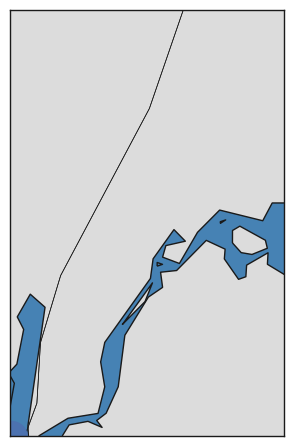

In [172]:
map.drawcoastlines()
map.drawcountries()
map.drawstates()
map.drawrivers()
map.fillcontinents(color = 'gainsboro')
map.drawmapboundary(fill_color='steelblue')
map.plot(samp['lat'][1],samp['long'][1],'bo', markersize = 24)

# Using Folium

In [127]:
!pip install folium

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [165]:
import folium

mCluster = folium.Map(location=[40.7831, -73.9712], zoom_start =12)
marker_cluster = folium.MarkerCluster().add_to(mCluster)
for i in range(len(samp)):
    if samp["GRADE"][i] =="A":
        folium.Marker([samp['lat'][i],samp['long'][i]], popup= "Name: " + str(samp['DBA'][i])+ '\n' + "Score: " + str(samp["SCORE"][i]) + '\n'+'Grade: '+ str(samp["GRADE"][i]),
                      icon=folium.Icon(color="green", icon='no-sign')).add_to(marker_cluster)
    elif samp["GRADE"][i]=="B":
         folium.Marker([samp['lat'][i],samp['long'][i]], popup= "Name: " + str(samp['DBA'][i])+ '\n' + "Score: " + str(samp["SCORE"][i]) + '\n'+'Grade: '+ str(samp["GRADE"][i]),
                      icon=folium.Icon(color='blue',icon='no-sign')).add_to(marker_cluster)
    else:
         folium.Marker([samp['lat'][i],samp['long'][i]], popup= "Name: " + str(samp['DBA'][i])+ '\n' + "Score: " + str(samp["SCORE"][i]) + '\n'+'Grade: '+ str(samp["GRADE"][i]),
                      icon=folium.Icon(color='red',icon='no-sign')).add_to(marker_cluster)

In [166]:
mCluster

In [129]:
m = folium.Map(location=[40.7831, -73.9712], zoom_start =12)
# marker_cluster = folium.MarkerCluster().add_to(m)
for i in range(len(samp)):
    if samp["GRADE"][i] =="A":
        folium.Marker([samp['lat'][i],samp['long'][i]], popup= "Name: " + str(samp['DBA'][i])+ '\n' + "Score: " + str(samp["SCORE"][i]) + '\n'+'Grade: '+ str(samp["GRADE"][i]),
                      icon=folium.Icon(color="green", icon='no-sign')).add_to(m)
    elif samp["GRADE"][i]=="B":
         folium.Marker([samp['lat'][i],samp['long'][i]], popup= "Name: " + str(samp['DBA'][i])+ '\n' + "Score: " + str(samp["SCORE"][i]) + '\n'+'Grade: '+ str(samp["GRADE"][i]),
                      icon=folium.Icon(color='blue',icon='no-sign')).add_to(m)
    else:
         folium.Marker([samp['lat'][i],samp['long'][i]], popup= "Name: " + str(samp['DBA'][i])+ '\n' + "Score: " + str(samp["SCORE"][i]) + '\n'+'Grade: '+ str(samp["GRADE"][i]),
                      icon=folium.Icon(color='red',icon='no-sign')).add_to(m)

In [160]:
m

In [130]:
m.save('restaurants.html')

# Using Bokeh

In [131]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [159]:
from bokeh.charts import Histogram, output_file, show

# create a new plot with a title and axis labels
p1=Histogram(samp['SCORE'])
# output_file("histogram.html")



In [158]:
show(p1)

In [157]:
from bokeh.charts import Histogram, output_file, show
from bokeh.sampledata.autompg import autompg as df

p2 = Histogram(mRests,'SCORE', color='GRADE',
              title="Score Grouped by Grade", bins = 15,
              legend='top_right')

# output_file("histogram_color.html")

In [154]:
show(p2)

In [153]:
from bokeh.models.widgets import Panel, Tabs
from bokeh.io import output_file, show
from bokeh.plotting import figure

tab1 = Panel(child=p1, title="Frequency of Score")
tab2 = Panel(child=p2, title="By Grade")

tabs = Tabs(tabs=[ tab1, tab2 ])
output_file("tabs.html")




INFO:bokeh.core.state:Session output file 'tabs.html' already exists, will be overwritten.


In [152]:
show(tabs)

# Using Plotly

In [135]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [143]:
x = mRests['GRADE']

tr1 = go.Histogram(x=x, histnorm='probability density', 
                xbins=dict(start=np.min(x), size= 0.25, end= np.max(x)),
                marker=dict(color='rgb(0,0,100)'))
title =" Probability Density of Grades"

layout = dict(
            title=title,
            autosize= True,
            bargap= 0.015,
            height= 600,
            width= 700,       
            hovermode= 'x',
            xaxis=dict(
            autorange= True,
            zeroline= False),
            yaxis= dict(
            autorange= True,
            showticklabels= True,
           ))
fig1 = go.Figure(data=go.Data([tr1]), layout=layout)



In [144]:
iplot(fig1)

In [146]:
x = samp['SCORE']

tr1 = go.Histogram(x=x, histnorm='probability density', 
                xbins=dict(start=np.min(x), size= 0.25, end= np.max(x)),
                marker=dict(color='rgb(0,0,100)'))

title =" Probability Density of Scores"

layout = dict(
            title=title,
            autosize= True,
            bargap= 0.015,
            height= 600,
            width= 700,       
            hovermode= 'x',
            xaxis=dict(
            autorange= True,
            zeroline= False),
            yaxis= dict(
            autorange= True,
            showticklabels= True,
           ))
fig2 = go.Figure(data=go.Data([tr1]), layout=layout)


In [147]:
iplot(fig2)

In [148]:
trace = go.Histogram(x=mRests['SCORE'])

data = go.Data([trace])


fig = dict(data=data)


In [149]:
iplot(fig)

In [150]:
samp['text'] = "Name: " + samp['DBA'].astype(str)+ '\n' + "Score: " + samp["SCORE"].astype(str) + '\n'+'Grade: '+ samp["GRADE"].astype(str)

scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = samp['long'],
        lat = samp['lat'],
        text = samp['text'],
        mode = 'markers',
        marker = dict( 
            size = 8, 
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 0,
            color = samp['SCORE'],
            cmax = samp['SCORE'].max(),
            colorbar=dict(
                title="Restaurant Score"
            )
        ))]

layout = dict(
        title = 'Restaurant Scores',
#         colorbar = True,   
        geo = dict(
            scope='usa',
#             projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5        
        ),
    )

fig = dict( data=data, layout=layout )


In [151]:
iplot(fig)